In [2]:
import sqlite3
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline

conn = sqlite3.connect('database.sqlite') # This might take a while to run...
to_parse = ['issue_d' , 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df = pd.read_sql_query('select * from loan', con=conn, parse_dates = to_parse)

In [3]:
check_null = df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(df))
check_null[check_null>0.6]

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
all_util                       0.975916
max_bal_bc                     0.975916
open_rv_24m                    0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
total_bal_il                   0.975916
open_il_24m                    0.975916
open_il_12m                    0.975916
open_il_6m                     0.975916
open_acc_6m                    0.975916
inq_fi                         0.975916
inq_last_12m                   0.975916
desc                           0.857977
mths_since_last_record         0.845554
mths_since_last_major_derog    0.750160
dtype: float64

In [4]:
df.drop(check_null[check_null>0.5].index, axis=1, inplace=True) 
df.dropna(axis=0, thresh=30, inplace=True)

In [6]:
df.groupby('application_type').size().sort_values()


application_type
JOINT            511
INDIVIDUAL    886871
dtype: int64

In [7]:
delete_me = ['index', 'policy_code', 'pymnt_plan', 'url', 'id', 'member_id', 'application_type', 'acc_now_delinq','emp_title', 'zip_code','title']
df.drop(delete_me , axis=1, inplace=True) 

In [8]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,NaN,NaN


In [9]:
df['term'] = df['term'].str.split(' ').str[1]

#interest rate is a string. Remove % and make it a float
df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = df.int_rate.astype(float)/100.

# extract numbers from emp_length and fill missing values with the median
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length'] = df['emp_length'].fillna(df.emp_length.median())

col_dates = df.dtypes[df.dtypes == 'datetime64[ns]'].index
for d in col_dates:
    df[d] = df[d].dt.to_period('M')

/home/amirwuzhere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [10]:
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36,0.1065,162.87,B,B2,10.0,RENT,...,0.00,0.00,2015-01,171.62,NaT,2016-01,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60,0.1527,59.83,C,C4,1.0,RENT,...,117.08,1.11,2013-04,119.66,NaT,2013-09,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36,0.1596,84.33,C,C5,10.0,RENT,...,0.00,0.00,2014-06,649.91,NaT,2016-01,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36,0.1349,339.31,C,C1,10.0,RENT,...,0.00,0.00,2015-01,357.48,NaT,2015-01,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60,0.1269,67.79,B,B5,1.0,RENT,...,0.00,0.00,2016-01,67.79,2016-02,2016-01,0.0,NaN,NaN,NaN


In [11]:
# pivot_ui(df.sample(frac=0.1))
# opens a new window

In [12]:
loan_status_grouped = df.groupby('loan_status').size().sort_values(ascending=False)/len(df) * 100
loan_status_grouped

loan_status
Current                                                67.815326
Fully Paid                                             23.408633
Charged Off                                             5.099044
Late (31-120 days)                                      1.306202
Issued                                                  0.953366
In Grace Period                                         0.704657
Late (16-30 days)                                       0.265613
Does not meet the credit policy. Status:Fully Paid      0.224030
Default                                                 0.137370
Does not meet the credit policy. Status:Charged Off     0.085758
dtype: float64

In [13]:
df['amt_difference'] = 'eq'
df.loc[(df['funded_amnt'] - df['funded_amnt_inv']) > 0,'amt_difference'] = 'less'


In [14]:
df['delinq_2yrs_cat'] = 'no'
df.loc[df['delinq_2yrs']> 0,'delinq_2yrs_cat'] = 'yes'

df['inq_last_6mths_cat'] = 'no'
df.loc[df['inq_last_6mths']> 0,'inq_last_6mths_cat'] = 'yes'

df['pub_rec_cat'] = 'no'
df.loc[df['pub_rec']> 0,'pub_rec_cat'] = 'yes'

# Create new metric
df['acc_ratio'] = df.open_acc / df.total_acc

In [15]:
features = ['loan_amnt', 'amt_difference', 'term', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 
            'open_acc', 'pub_rec', 'pub_rec_cat', 'acc_ratio', 'initial_list_status',  
            'loan_status'
           ]

In [16]:
X_clean = df.loc[df.loan_status != 'Current', features]

In [18]:
X_clean.head()

,loan_amnt,amt_difference,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs_cat,inq_last_6mths_cat,open_acc,pub_rec,pub_rec_cat,acc_ratio,initial_list_status,loan_status
0,5000.0,less,36,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,no,yes,3.0,0.0,no,0.333333,f,Fully Paid
1,2500.0,eq,60,59.83,C,1.0,RENT,30000.0,Source Verified,car,1.00,no,yes,3.0,0.0,no,0.750000,f,Charged Off
2,2400.0,eq,36,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,no,yes,2.0,0.0,no,0.200000,f,Fully Paid
3,10000.0,eq,36,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,no,yes,10.0,0.0,no,0.270270,f,Fully Paid
5,5000.0,eq,36,156.46,A,3.0,RENT,36000.0,Source Verified,wedding,11.20,no,yes,9.0,0.0,no,0.750000,f,Fully Paid


In [20]:
mask = (X_clean.loan_status == 'Charged Off')
X_clean['target'] = 0
X_clean.loc[mask,'target'] = 1

In [34]:
cat_features = ['term','amt_difference', 'grade', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 'pub_rec_cat', 'initial_list_status']

# Drop any residual missing value (only 24)
X_clean.dropna(axis=0, how = 'any', inplace = True)

X = pd.get_dummies(X_clean[X_clean.columns[:-2]], columns=cat_features).astype(float)
y = X_clean['target']
print(y)
print(X)

0         0
1         1
2         0
3         0
5         0
7         0
8         1
9         1
10        0
11        0
12        1
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        0
26        1
27        1
28        0
29        0
30        0
31        0
         ..
887202    0
887206    0
887219    0
887235    0
887252    0
887253    0
887258    1
887262    0
887267    0
887268    0
887272    1
887279    1
887280    0
887283    0
887284    0
887294    1
887307    1
887312    1
887326    0
887334    1
887336    0
887341    0
887349    0
887350    0
887351    0
887355    1
887368    0
887370    0
887373    0
887375    1
Name: target, Length: 285572, dtype: int64
        loan_amnt  installment  emp_length  annual_inc    dti  open_acc  \
0          5000.0       162.87        10.0    24000.00  27.65       3.0   
1          2500.0        59.83         1.0    30000.00   1.00       3.0   


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

X_scaled = preprocessing.scale(X)

In [25]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10)
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 


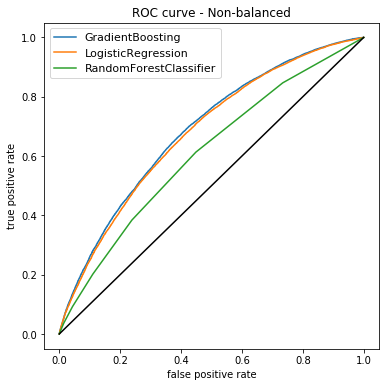

In [26]:
#mpl.rc("savefig", dpi=300)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.4, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')

In [28]:
models_report

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.037493,0.686181,0.468468,0.005751,0.011362,Non-balanced
1,LogisticRegression,0.022505,0.678667,0.516667,0.001714,0.003417,Non-balanced
2,RandomForestClassifier,0.059633,0.608268,0.318116,0.036607,0.065658,Non-balanced


In [29]:
conf_matrix['LogisticRegression']

Predicted,0,1
True,,
0,96116,29
1,18053,31


computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 


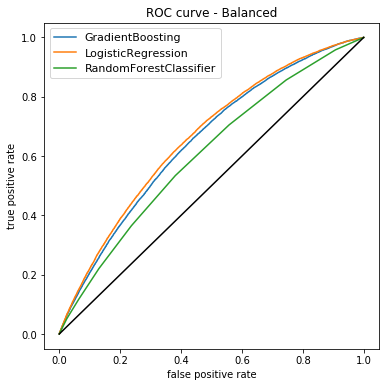

In [30]:
index_split = int(len(X)/2)
X_train, y_train = SMOTE().fit_sample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]

#scores = cross_val_score(clf, X_scaled, y , cv=5, scoring='roc_auc')

models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

In [31]:
conf_matrix_bal['LogisticRegression']

Predicted,0,1
True,,
0,64546,57691
1,5991,14558
